In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [4]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [5]:
#check is there any null data or not
data.isnull().any()

order_id          False
shop_id           False
user_id           False
order_amount      False
total_items       False
payment_method    False
created_at        False
dtype: bool

In [6]:
#check is there any duplicate data or not
data.duplicated().any() 

False

In [7]:
data.shape

(5000, 7)

In [8]:
#arrange the data in the asceding order of the creation date
data.sort_values(by=['created_at'])['created_at']

1862    2017-03-01 0:08:09
1741    2017-03-01 0:10:19
3228    2017-03-01 0:14:12
1267    2017-03-01 0:19:31
2689    2017-03-01 0:22:25
               ...        
2765    2017-03-30 9:22:41
4890    2017-03-30 9:27:00
244     2017-03-30 9:30:28
211     2017-03-30 9:40:40
145     2017-03-30 9:55:00
Name: created_at, Length: 5000, dtype: object

In [9]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [10]:
#total sum of the order amount
total_sum = data['order_amount'].sum()
print(total_sum)

15725640


In [11]:
#count total items. 
count_items =data['total_items'].count()
print(count_items)

5000


In [12]:
#AOV that wrongly calculated in the challange. In the challange,
#they have taken a count of orders and count will just simply count the total number of rows
AOV = total_sum/count_items
print(AOV)

3145.128


In [13]:
#I have used sum of total_items that gives total number of items sold. 
total_items = data['total_items'].sum()
print(total_items)

43936


In [14]:
#New average of AOV calculation 
AOVn = total_sum/total_items
print(AOVn)

357.92152221412965


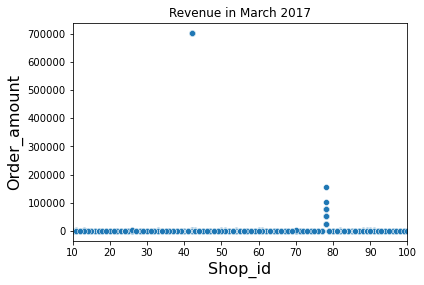

<Figure size 720x432 with 0 Axes>

In [17]:
sns.scatterplot(data = data, x='shop_id',y='order_amount')
plt.xlim(10, 100)
plt.xlabel("Shop_id", size=16)
plt.ylabel("Order_amount", size=16)
plt.title("price of shoes in shop", size=24)
plt.title('Revenue in March 2017')
plt.figure(figsize=(10,6))
plt.show()

In [ ]:
#If the AOV means total revenue divide by the total numbers of order then $357.9215 is new AOV. 
# In the above scattler plot shows that there are some anomiles present in the data. 
# So we calculate the AOv for each shop

In [19]:
#Total_revenue of each shop
each_shop_total_revenue = data.groupby(['shop_id'])['order_amount'].agg('sum')
print(each_shop_total_revenue)

shop_id
1      13588
2       9588
3      14652
4      13184
5      13064
       ...  
96     16830
97     15552
98     14231
99     18330
100     8547
Name: order_amount, Length: 100, dtype: int64


In [20]:
#Total orders of each shop
each_shop_total_order = data.groupby(['shop_id'])['total_items'].agg('sum')
print(each_shop_total_order)

shop_id
1       86
2      102
3       99
4      103
5       92
      ... 
96     110
97      96
98     107
99      94
100     77
Name: total_items, Length: 100, dtype: int64


In [21]:
#AOV of each shop
each_shop_aov =  each_shop_total_revenue/each_shop_total_order
print(each_shop_aov)
each_shop_aov.name = 'aov'

shop_id
1      158.0
2       94.0
3      148.0
4      128.0
5      142.0
       ...  
96     153.0
97     162.0
98     133.0
99     195.0
100    111.0
Length: 100, dtype: float64


In [22]:
#New datatable
each_shop_data = pd.concat([each_shop_total_revenue, each_shop_total_order,each_shop_aov], axis=1)
each_shop_data

,order_amount,total_items,aov
shop_id,,,
1,13588,86,158.0
2,9588,102,94.0
3,14652,99,148.0
4,13184,103,128.0
5,13064,92,142.0
...,...,...,...
96,16830,110,153.0
97,15552,96,162.0
98,14231,107,133.0


In [23]:
#mean, median and mode of AOV
print("Mean of  AOV:",each_shop_data['aov'].mean())
print("Median of AOV:",each_shop_data['aov'].median())
print("Mode of AOV:",each_shop_data['aov'].mode()[0])

Mean of  AOV: 407.99
Median of AOV: 153.0
Mode of AOV: 153.0


In [ ]:
#Here mean of the AOV is too high. Mode of the AOV is the 153 means majority of the shop are selling snakers at the same price.
#Also, above scattler plot shows that shop_id =78 order_amount is too high.
#we can remove this shop id and check again the AOV. 

In [69]:
data_shopid_78 = data[data['shop_id'] == 78]
data_shopid_78.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,46.000000,46.0,46.000000,46.000000,46.000000
mean,2663.021739,78.0,867.739130,49213.043478,1.913043
std,1338.520020,0.0,81.314871,26472.227449,1.029047
min,161.000000,78.0,707.000000,25725.000000,1.000000
25%,1428.250000,78.0,812.500000,25725.000000,1.000000
50%,2796.500000,78.0,866.500000,51450.000000,2.000000
75%,3720.250000,78.0,935.750000,51450.000000,2.000000
max,4919.000000,78.0,997.000000,154350.000000,6.000000


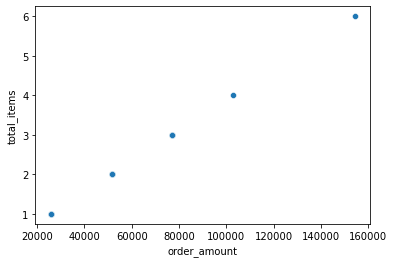

In [87]:
sns.scatterplot(data = data_shopid_78, x='order_amount',y='total_items')
plt.show()

In [24]:
new_data_of_each_shop = each_shop_data.drop([78])

In [25]:
print("Mean AOV:",new_data_of_each_shop['aov'].mean())
print("Median AOV:",new_data_of_each_shop['aov'].median())
print("Mode AOV:",new_data_of_each_shop['aov'].mode()[0])

Mean AOV: 152.26262626262627
Median AOV: 153.0
Mode AOV: 153.0


In [ ]:
#So, above AOV of each shop is $153. 